<a href="https://colab.research.google.com/github/GaetanAm/Sentiment-Analysis-and-Impact-on-Financial-Markets/blob/main/notebooks/Stage_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [128]:
# Imports nécessaires
import pandas as pd
import yfinance as yf
import plotly.express as px
import zipfile
import json
import os
from google.colab import files
from datetime import date
from lxml import etree
from io import StringIO
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import pandas as pd
from huggingface_hub import login
from transformers import pipeline
from google.colab import userdata
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import plot_tree
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import learning_curve
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor

# Désactiver les avertissements inutiles
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

# FAIRE TOUTES LES ANOTATIONS + TITRES + ANALYSES COMME SUR LE STAGE 1

In [ ]:
tickers = ['TSLA', 'AAPL', 'AMZN', 'JPM', 'NFLX', 'NVDA', 'GOOG', 'NKE', 'DIS', 'BABA', 'SHOP']
start = '2010-01-01'
end = '2018-12-31'
df_ticker_return = pd.DataFrame()
for ticker in tickers:
    ticker_yf = yf.Ticker(ticker)
    if df_ticker_return.empty:
        df_ticker_return = ticker_yf.history(start = start, end = end)
        df_ticker_return['ticker']= ticker
    else:
        data_temp = ticker_yf.history(start = start, end = end)
        data_temp['ticker']= ticker
        # Use pandas.concat instead of append
        df_ticker_return = pd.concat([df_ticker_return, data_temp])
df_ticker_return.to_csv(r'return_data.csv')

In [ ]:
df_ticker_return.head(5)

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0,TSLA
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0,TSLA
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0,TSLA
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0,TSLA
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0,TSLA


In [ ]:
# We can preread the data
df_ticker_return = pd.read_csv('return_data.csv',
                               index_col='Date')
df_ticker_return.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,ticker
Date,,,,,,,,
2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0,TSLA
2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0,TSLA
2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0,TSLA
2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0,TSLA
2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0,TSLA


In [ ]:
tickers = list(df_ticker_return['ticker'].unique())
print(tickers)

['TSLA', 'AAPL', 'AMZN', 'JPM', 'NFLX', 'NVDA', 'GOOG', 'NKE', 'DIS', 'BABA', 'SHOP']


In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_csv('return_data.csv', index_col='Date', parse_dates=True)

# Vérifier les valeurs manquantes
print("Valeurs manquantes par colonne :\n", df.isnull().sum())

# Imputation des valeurs manquantes par la moyenne
imputer = SimpleImputer(strategy='mean')
df.iloc[:, :-1] = imputer.fit_transform(df.iloc[:, :-1])  # Ignorer la colonne 'ticker'


Valeurs manquantes par colonne :
 Open            0
High            0
Low             0
Close           0
Volume          0
Dividends       0
Stock Splits    0
ticker          0
dtype: int64


In [ ]:
# Standardisation avec StandardScaler
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled.iloc[:, :-1] = scaler.fit_transform(df.iloc[:, :-1])

# Normalisation avec MinMaxScaler
minmax_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized.iloc[:, :-1] = minmax_scaler.fit_transform(df.iloc[:, :-1])


In [ ]:
# Ajouter une colonne fictive 'target' pour la démonstration
df['target'] = (df['Close'] > df['Close'].median()).astype(int)

# Utiliser SMOTE pour équilibrer les classes
smote = SMOTE()
X = df.drop(columns=['target', 'ticker'])
y = df['target']
X_resampled, y_resampled = smote.fit_resample(X, y)

# Vérifier les nouvelles proportions
print("Proportions après SMOTE :\n", y_resampled.value_counts())


Proportions après SMOTE :
 target
0    11116
1    11116
Name: count, dtype: int64


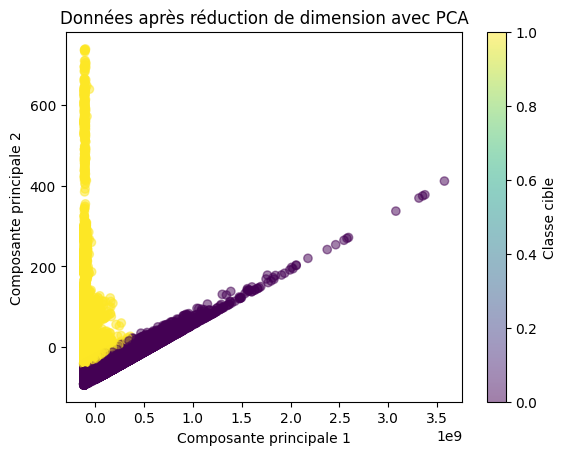

In [ ]:
# Appliquer PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_resampled)

# Visualiser les données réduites
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_resampled, cmap='viridis', alpha=0.5)
plt.title("Données après réduction de dimension avec PCA")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.colorbar(label='Classe cible')
plt.show()


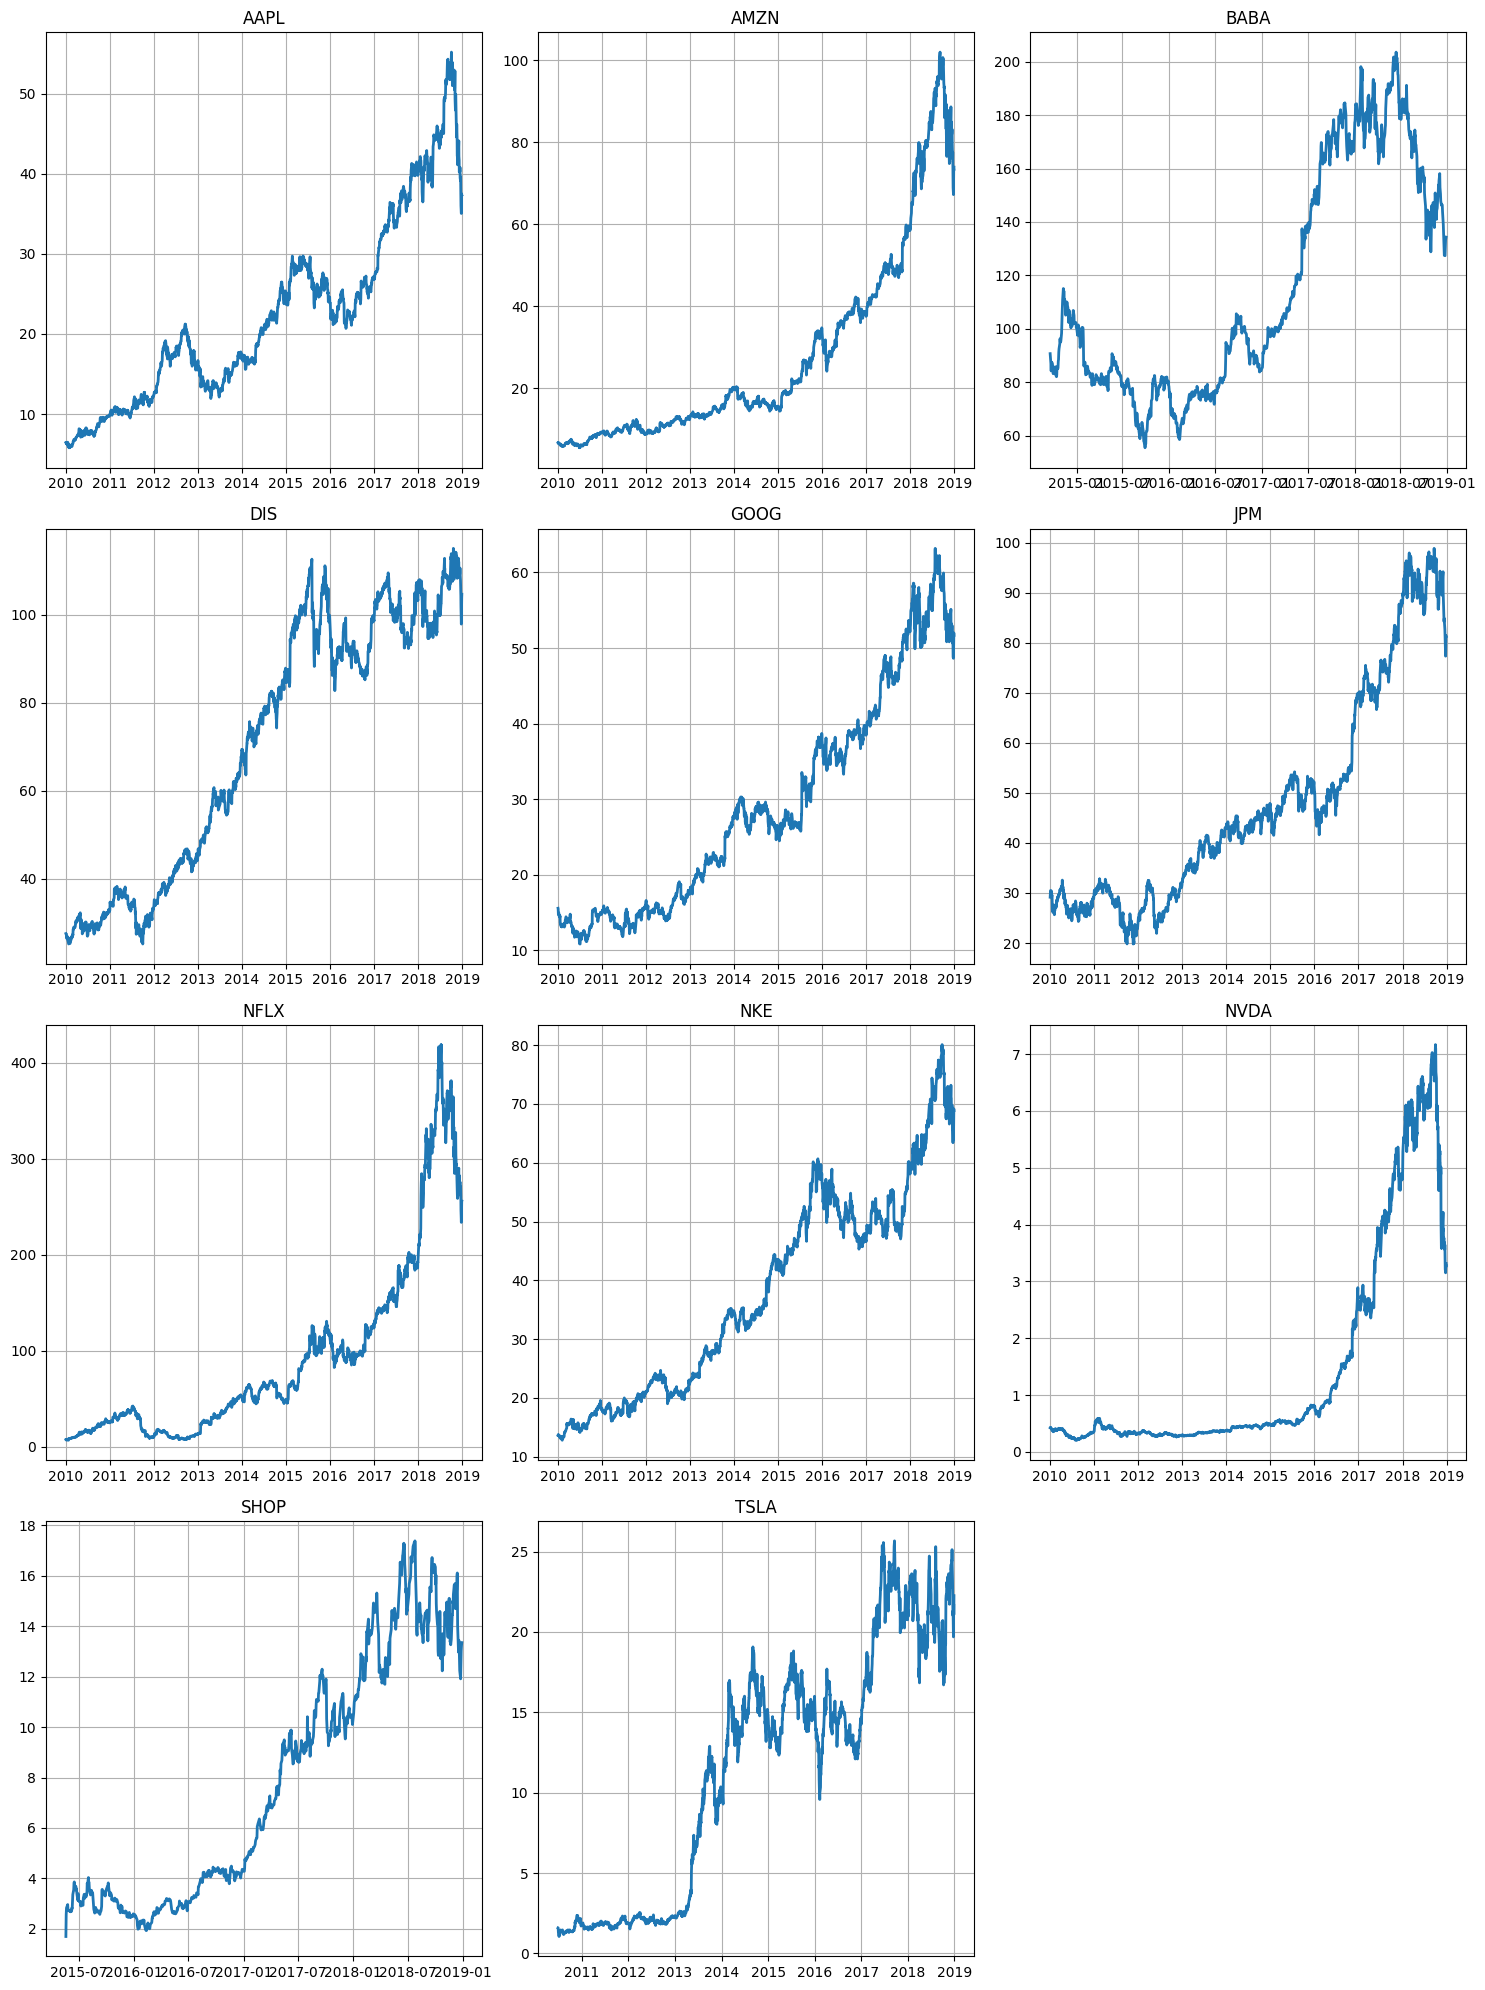

In [ ]:
import math

# Calculer le nombre de tickers
tickers = list(df['ticker'].unique())
num_tickers = len(tickers)

# Déterminer les dimensions de la grille
cols = 3  # Fixer le nombre de colonnes
rows = math.ceil(num_tickers / cols)  # Calculer dynamiquement le nombre de lignes

# Créer la grille avec le bon nombre de sous-graphiques
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15, 5 * rows))
axes = axes.flatten()

# Tracer les séries par ticker
for idx, (ticker, group) in enumerate(df.groupby('ticker')):
    axes[idx].plot(group['Close'], linewidth=2, label=ticker)
    axes[idx].set_title(ticker)
    axes[idx].grid(True)

# Désactiver les axes inutilisés (si les sous-graphiques dépassent le nombre de tickers)
for ax in axes[num_tickers:]:
    ax.axis('off')

plt.tight_layout()
plt.show()


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Raw Headline Data.zip to Raw Headline Data.zip


In [ ]:
import zipfile
import json
import os

# Get the current working directory
current_directory = os.getcwd()

# Construct the path to the zip file relative to the current directory
zip_file_path = os.path.join(current_directory, "Raw Headline Data.zip")

# Print the path to verify it's correct
print(f"Looking for the file at: {zip_file_path}")

# Try opening the zip file
try:
    z = zipfile.ZipFile(zip_file_path, "r")
    testFile = z.namelist()[10]
    fileData = z.open(testFile).read()
    fileDataSample = json.loads(fileData)['content'][1:500]

    # json format
    print(fileDataSample)

except FileNotFoundError:
    print(f"Error: File not found at {zip_file_path}. Please ensure the file is present and the path is correct.")

Looking for the file at: /content/Raw Headline Data.zip
li class="n-box-item date-title" data-end="1305172799" data-start="1305086400" data-txt="Tuesday, December 17, 2019">Wednesday, May 11, 2011</li><li class="n-box-item sa-box-item" data-id="76179" data-ts="1305149244"><div class="media media-overflow-fix"><div class="media-left"><a class="box-ticker" href="/symbol/CSCO" target="_blank">CSCO</a></div><div class="media-body"><h4 class="media-heading"><a href="/news/76179" sasource="on_the_move_news_fidelity" target="_blank">Cisco (NASDAQ:CSCO): Pr


In [ ]:
from lxml import etree
from io import StringIO
from datetime import date
from tqdm.notebook import tqdm

# helper function performs the jsn parsing

def jsonParser(json_data):
    xml_data = json_data['content']

    tree = etree.parse(StringIO(xml_data), parser=etree.HTMLParser())

    headlines = tree.xpath("//h4[contains(@class, 'media-heading')]/a/text()")
    assert len(headlines) == json_data['count']

    main_tickers = list(map(lambda x: x.replace('/symbol/', ''), tree.xpath("//div[contains(@class, 'media-left')]//a/@href")))
    assert len(main_tickers) == json_data['count']
    final_headlines = [''.join(f.xpath('.//text()')) for f in tree.xpath("//div[contains(@class, 'media-body')]/ul/li[1]")]
    if len(final_headlines) == 0:
        final_headlines = [''.join(f.xpath('.//text()')) for f in tree.xpath("//div[contains(@class, 'media-body')]")]
        final_headlines = [f.replace(h, '').split('\xa0')[0].strip() for f,h in zip (final_headlines, headlines)]

    return main_tickers, final_headlines


data = None
data_df_news = []
ret = []
ret_f = []
with zipfile.ZipFile("/content/Raw Headline Data.zip", "r") as z:

    for filename in tqdm(z.namelist()):
#         print(filename)
        try:
            #print('Running {}'.format(filename))
            with z.open(filename) as f:
                data = f.read()
                json_data = json.loads(data)
            if json_data.get('count', 0)> 10:

                #Step 1: Parse the News Jsons
                main_tickers, final_headlines = jsonParser(json_data)

                if len(final_headlines) != json_data['count']:
                    continue

                #Step 2: Prepare Future and Event Return and assign Future and Event return for each ticker.
                file_date = filename.split('/')[-1].replace('.json', '')
                file_date = date(int(file_date[:4]), int(file_date[5:7]), int(file_date[8:]))

               #Step 3: Merge all the data in a data frame
                df_dict = {'ticker': main_tickers,
                           'headline': final_headlines,
                           'date': [file_date] * len(main_tickers)}

                df_f = pd.DataFrame(df_dict)
                data_df_news.append(df_f)

        except:
            pass

data_df_news=pd.concat(data_df_news)
display(data_df_news.head())
print(data_df_news.shape)

  0%|          | 0/3159 [00:00<?, ?it/s]

,ticker,headline,date
0,DVA,Davita (NYSE:DVA): EPS of $0.96 beats by $0.01...,2011-05-02
1,CGNX,Cognex (NASDAQ:CGNX): EPS of $0.32 beats by $0...,2011-05-02
2,AEIS,Advanced Energy Industries (NASDAQ:AEIS):,2011-05-02
3,LOCM,Local.com (NASDAQ:LOCM):,2011-05-02
4,CYDEQ,CyberDefender (CYDE):,2011-05-02


(122613, 3)


In [ ]:
# select all tickers except for empty
data_df_news = data_df_news[~(data_df_news['ticker'] == '')]
data_df_news.shape

(110711, 3)

In [ ]:
px.bar(data_df_news['ticker'].value_counts()[:100],template="plotly_white")

In [ ]:
#Computing the return
df_ticker_return['ret_curr'] = df_ticker_return['Close'].pct_change()

#Computing the event return
rtp1 = df_ticker_return['ret_curr'].shift(1) # return a day after the news
rt = df_ticker_return['ret_curr'] # return the day of the news

df_ticker_return['eventRet'] =  rt + rtp1
df_ticker_return.reset_index(level=0, inplace=True)

df_ticker_return['date'] = pd.to_datetime(df_ticker_return['Date']).apply(lambda x: x.date())

In [ ]:
# merge on date and ticker
df_all = pd.merge(data_df_news, df_ticker_return,
                  how='left',
                  left_on=['date','ticker'],
                  right_on=['date','ticker'])

df_all = df_all[df_all['ticker'].isin(tickers)]
df_all = df_all[['ticker','headline','date','eventRet','Close']]
df_all = df_all.dropna()
df_all = df_all.reset_index(drop=True)
df_all.to_csv('combined.csv',index=False)

In [ ]:
# preread combined dataframe
data_df = pd.read_csv('combined.csv')
data_df = data_df.dropna()
data_df.head()

,ticker,headline,date,eventRet,Close
0,AMZN,Whole Foods (WFMI) -5.2% following a downgrade...,2011-05-02,0.031269,10.059500
1,NFLX,Netflix (NFLX +1.1%) shares post early gains a...,2011-05-02,0.012173,33.884285
2,AMZN,Amazon.com (AMZN -1.7%) shares slip as comment...,2011-05-12,0.010426,10.303500
3,NVDA,Nvidia (NVDA -8.2%) shares slump after Needham...,2011-05-13,-0.077562,0.418649
4,GOOG,"It's been some time coming, but Google (GOOG -...",2011-05-16,-0.031297,12.865873


In [ ]:
print(data_df.shape, data_df.ticker.unique().shape)

(2586, 5) (11,)


In [ ]:
data_df['sent_blob'] = data_df['headline'].apply(lambda row: TextBlob(row).sentiment.polarity)
data_df.head()

,ticker,headline,date,eventRet,Close,sent_blob
0,AMZN,Whole Foods (WFMI) -5.2% following a downgrade...,2011-05-02,0.031269,10.059500,0.262500
1,NFLX,Netflix (NFLX +1.1%) shares post early gains a...,2011-05-02,0.012173,33.884285,-0.043750
2,AMZN,Amazon.com (AMZN -1.7%) shares slip as comment...,2011-05-12,0.010426,10.303500,0.000000
3,NVDA,Nvidia (NVDA -8.2%) shares slump after Needham...,2011-05-13,-0.077562,0.418649,0.113636
4,GOOG,"It's been some time coming, but Google (GOOG -...",2011-05-16,-0.031297,12.865873,0.125000


In [ ]:
login(userdata.get('LOGIN_HF'))
# Charger FinBERT
sentiment_pipeline = pipeline("sentiment-analysis", model="yiyanghkust/finbert-tone")
def analyze_sentiment(text):
    try:
        return sentiment_pipeline(inputs=text)[0]['label']  # Utiliser "inputs" si "text" ne fonctionne pas
    except Exception as e:
        print(f"Erreur avec le texte : {text} -> {e}")
        return "Error"
# Appliquer l'analyse des sentiments à tous les titres
data_df['sent_finbert'] = data_df['headline'].apply(analyze_sentiment)

# Afficher un aperçu des résultats
print(data_df[['headline', 'sent_finbert']].head())

config.json:   0%|          | 0.00/533 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/439M [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/226k [00:00<?, ?B/s]

Device set to use cpu


KeyboardInterrupt: 

In [ ]:
data_df.head()

In [ ]:
def map_finbert_sentiment(label):
    if label == "Positive":
        return 1
    elif label == "Negative":
        return -1
    else:
        return 0

data_df['sent_finbert_score'] = data_df['sent_finbert'].apply(map_finbert_sentiment)

In [ ]:
data_df.head()

In [ ]:
# Suppression de la colonne 'sent_finbert'
data_df = data_df.drop(columns=['sent_finbert'])

# Sauvegarder le DataFrame en CSV
csv_path = "sentiment_data.csv"
data_df.to_csv(csv_path, index=False)

# Télécharger le fichier CSV

# files.download(csv_path)

# MACHINE LEARNING

## Initialisation

In [103]:
uploaded = files.upload()

Saving sentiment_data.csv to sentiment_data (2).csv


In [104]:
data_df = pd.read_csv("sentiment_data.csv")

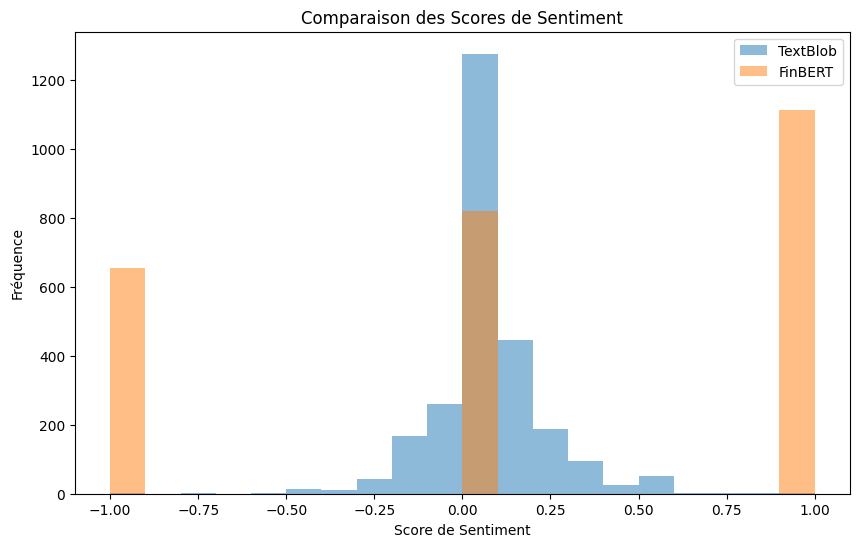

In [105]:
# Comparer les distributions
plt.figure(figsize=(10, 6))
plt.hist(data_df['sent_blob'], bins=20, alpha=0.5, label='TextBlob')
plt.hist(data_df['sent_finbert_score'], bins=20, alpha=0.5, label='FinBERT')
plt.legend()
plt.title("Comparaison des Scores de Sentiment")
plt.xlabel("Score de Sentiment")
plt.ylabel("Fréquence")
plt.show()

In [106]:
# Calcul des corrélations
print(data_df[['eventRet', 'sent_blob', 'sent_finbert_score']].corr())

                    eventRet  sent_blob  sent_finbert_score
eventRet            1.000000   0.075331            0.294376
sent_blob           0.075331   1.000000            0.203759
sent_finbert_score  0.294376   0.203759            1.000000


## Linear regression

In [107]:
# TextBlob only
X_blob = data_df[['sent_blob']]
y = data_df['eventRet']  # Target variable for regression

# FinBERT only
X_finbert = data_df[['sent_finbert_score']]

# Combined data (TextBlob + FinBERT)
X_combined = data_df[['sent_blob', 'sent_finbert_score']]

In [108]:
# Function to run linear regression
def run_linear_regression(X, y, label):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Linear regression model
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)

    # Predictions
    y_pred = lin_reg.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {label} ---")
    print(f"MSE: {mse}")
    print(f"R²: {r2}\n")

    return mse, r2

# Regression on TextBlob
mse_blob, r2_blob = run_linear_regression(X_blob, y, "TextBlob")

# Regression on FinBERT
mse_finbert, r2_finbert = run_linear_regression(X_finbert, y, "FinBERT")

# Regression on Combined data
mse_combined, r2_combined = run_linear_regression(X_combined, y, "Combined (TextBlob + FinBERT)")

--- TextBlob ---
MSE: 0.004412127354992046
R²: 0.0033942007995203527

--- FinBERT ---
MSE: 0.004243768566852293
R²: 0.04142287293578628

--- Combined (TextBlob + FinBERT) ---
MSE: 0.004241378720764001
R²: 0.041962688376084745



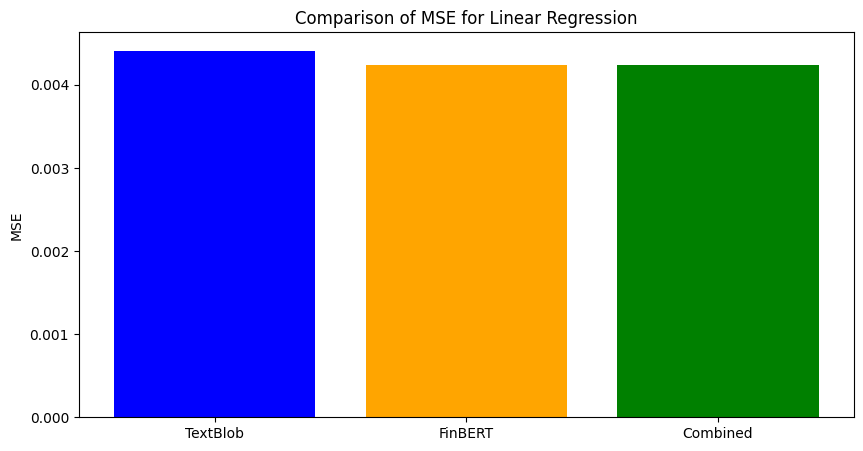

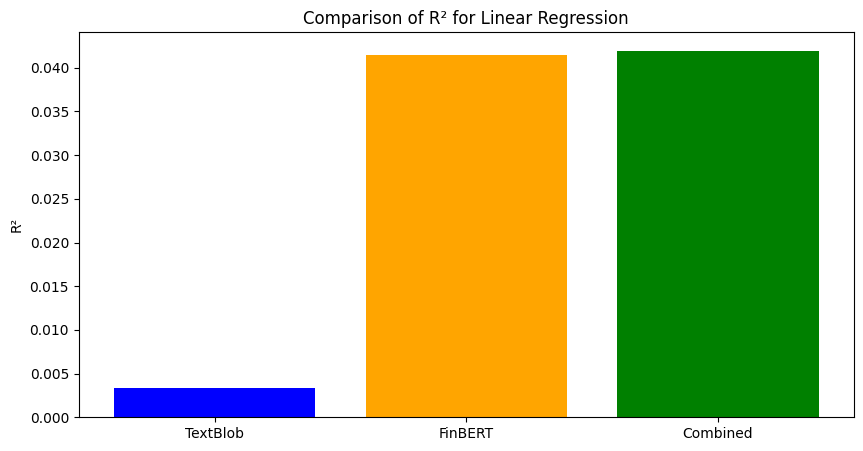

In [109]:
# Results
labels = ['TextBlob', 'FinBERT', 'Combined']
mse_values = [mse_blob, mse_finbert, mse_combined]
r2_values = [r2_blob, r2_finbert, r2_combined]

# MSE
plt.figure(figsize=(10, 5))
plt.bar(labels, mse_values, color=['blue', 'orange', 'green'])
plt.title("Comparison of MSE for Linear Regression")
plt.ylabel("MSE")
plt.show()

# R²
plt.figure(figsize=(10, 5))
plt.bar(labels, r2_values, color=['blue', 'orange', 'green'])
plt.title("Comparison of R² for Linear Regression")
plt.ylabel("R²")
plt.show()

## Logistic regression

In [111]:
# TextBlob only
# Creates a binary variable (return positive/negative)
data_df['target_binary'] = (data_df['eventRet'] > 0).astype(int)
X_blob = data_df[['sent_blob']]
y = data_df['target_binary']  # Binary target variable

# FinBERT only
X_finbert = data_df[['sent_finbert_score']]

# Combined data (TextBlob + FinBERT)
X_combined = data_df[['sent_blob', 'sent_finbert_score']]

In [112]:
# Function to run logistic regression
def run_logistic_regression(X, y, label):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Logistic regression model
    log_reg = LogisticRegression()
    log_reg.fit(X_train, y_train)

    # Predictions
    y_pred = log_reg.predict(X_test)

    # Evaluation
    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)

    print(f"--- {label} ---")
    print(f"Accuracy: {acc}")
    print("Classification Report:")
    print(report)

    return acc

# Logistic regression on TextBlob
acc_blob = run_logistic_regression(X_blob, y, "TextBlob")

# Logistic regression on FinBERT
acc_finbert = run_logistic_regression(X_finbert, y, "FinBERT")

# Logistic regression on Combined data
acc_combined = run_logistic_regression(X_combined, y, "Combined (TextBlob + FinBERT)")


--- TextBlob ---
Accuracy: 0.5308880308880309
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.04      0.08       249
           1       0.53      0.98      0.68       269

    accuracy                           0.53       518
   macro avg       0.61      0.51      0.38       518
weighted avg       0.60      0.53      0.40       518

--- FinBERT ---
Accuracy: 0.6447876447876448
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.42      0.53       249
           1       0.61      0.85      0.71       269

    accuracy                           0.64       518
   macro avg       0.67      0.64      0.62       518
weighted avg       0.67      0.64      0.63       518

--- Combined (TextBlob + FinBERT) ---
Accuracy: 0.6447876447876448
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.42      0.53       249
          

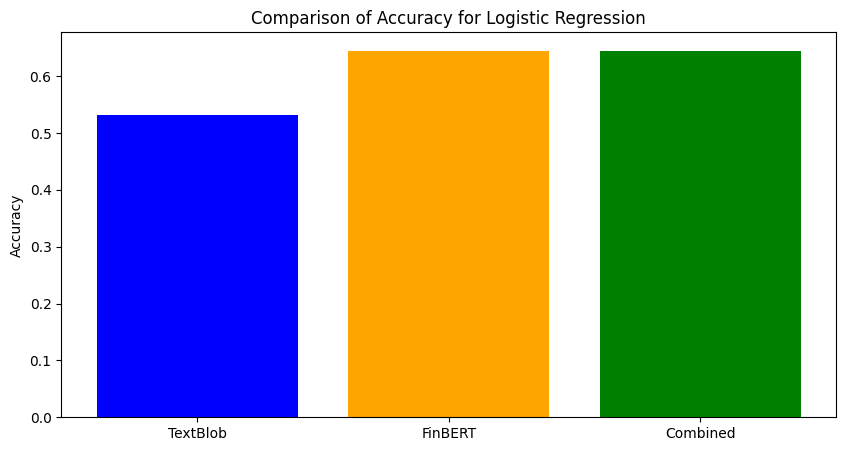

In [113]:
# Results
labels = ['TextBlob', 'FinBERT', 'Combined']
accuracy_values = [acc_blob, acc_finbert, acc_combined]

# Accuracy
plt.figure(figsize=(10, 5))
plt.bar(labels, accuracy_values, color=['blue', 'orange', 'green'])
plt.title("Comparison of Accuracy for Logistic Regression")
plt.ylabel("Accuracy")
plt.show()

## Decision Tree Regression

In [ ]:
# TextBlob only
X_blob = data_df[['sent_blob']]
y = data_df['eventRet']  # Target variable for regression

# FinBERT only
X_finbert = data_df[['sent_finbert_score']]

# Combined data (TextBlob + FinBERT)
X_combined = data_df[['sent_blob', 'sent_finbert_score']]

In [118]:
# Function to run Decision Tree Regression
def run_decision_tree_regression(X, y, label, max_depth=3):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Decision Tree Regressor
    tree_reg = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    tree_reg.fit(X_train, y_train)

    # Predictions
    y_pred = tree_reg.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {label} ---")
    print(f"MSE: {mse}")
    print(f"R²: {r2}\n")

    return mse, r2, tree_reg

# Decision Tree on TextBlob
mse_blob, r2_blob, tree_blob = run_decision_tree_regression(X_blob, y, "TextBlob")

# Decision Tree on FinBERT
mse_finbert, r2_finbert, tree_finbert = run_decision_tree_regression(X_finbert, y, "FinBERT")

# Decision Tree on Combined data
mse_combined, r2_combined, tree_combined = run_decision_tree_regression(X_combined, y, "Combined (TextBlob + FinBERT)")

--- TextBlob ---
MSE: 0.2542888171238701
R²: -0.018673841327321083

--- FinBERT ---
MSE: 0.22316740449549777
R²: 0.10599766136889666

--- Combined (TextBlob + FinBERT) ---
MSE: 0.22487797513788374
R²: 0.09914516354044423



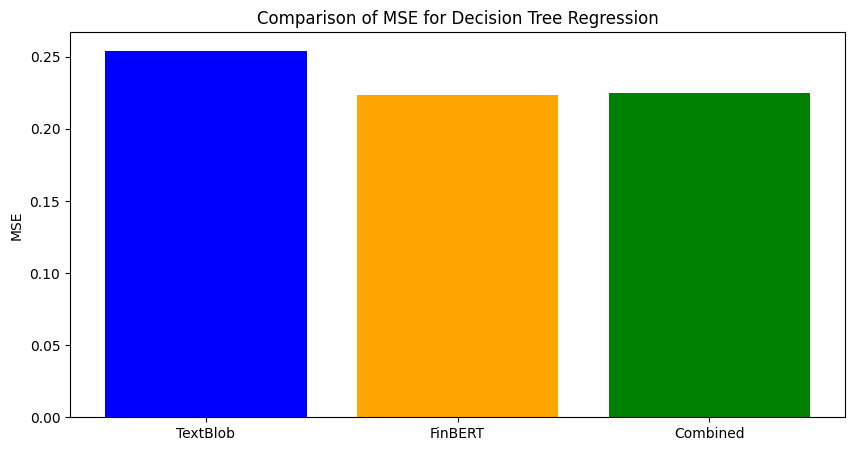

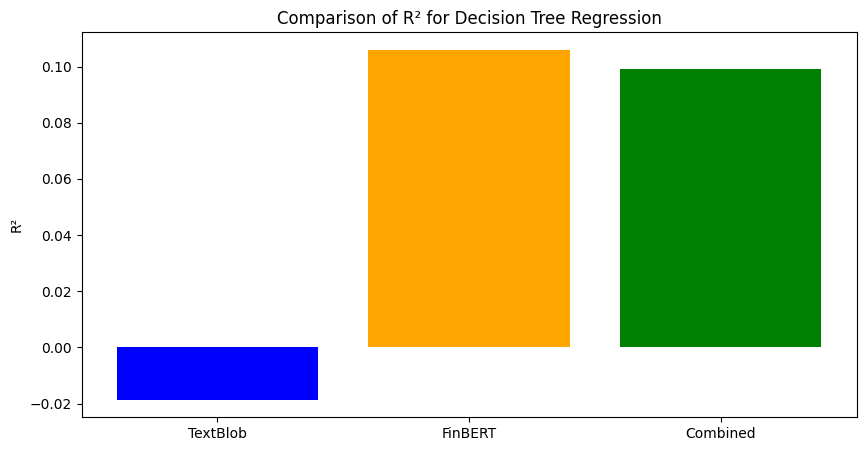

In [120]:
# Results
labels = ['TextBlob', 'FinBERT', 'Combined']
mse_values = [mse_blob, mse_finbert, mse_combined]
r2_values = [r2_blob, r2_finbert, r2_combined]

# MSE
plt.figure(figsize=(10, 5))
plt.bar(labels, mse_values, color=['blue', 'orange', 'green'])
plt.title("Comparison of MSE for Decision Tree Regression")
plt.ylabel("MSE")
plt.show()

# R²
plt.figure(figsize=(10, 5))
plt.bar(labels, r2_values, color=['blue', 'orange', 'green'])
plt.title("Comparison of R² for Decision Tree Regression")
plt.ylabel("R²")
plt.show()

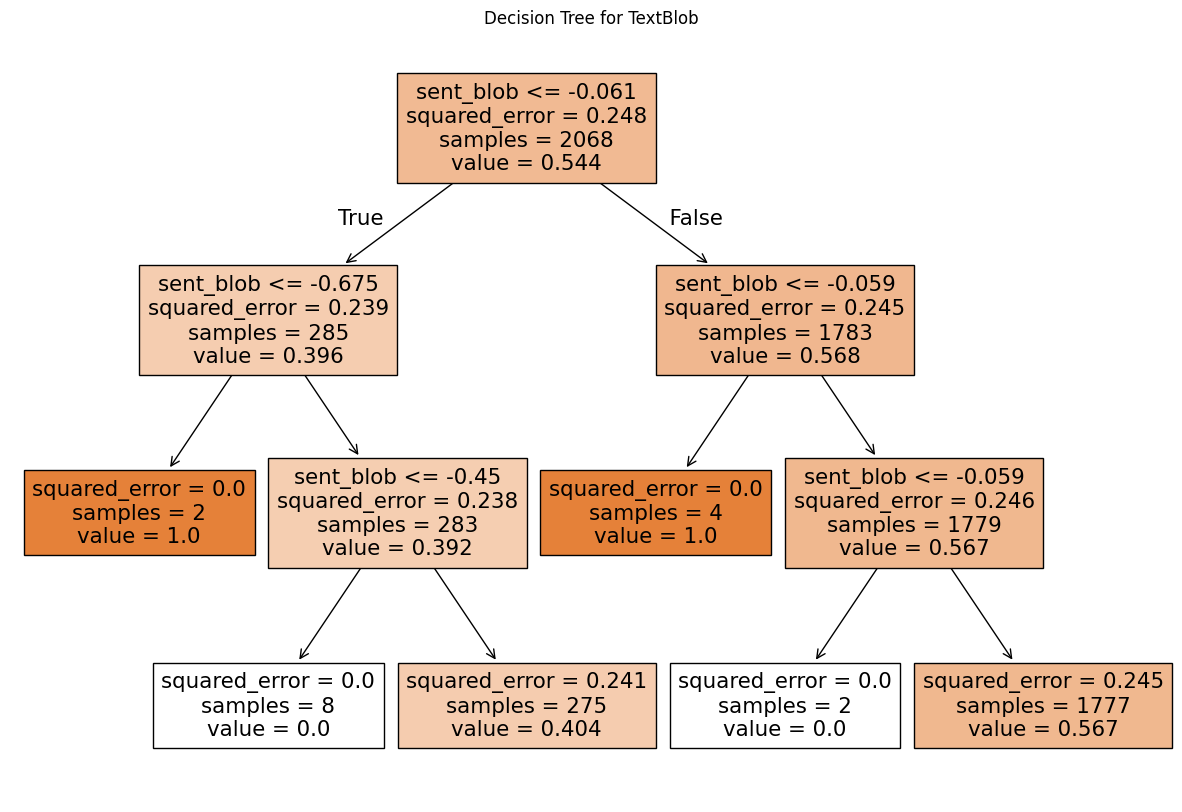

In [123]:
# Plot the decision tree for TextBlob
plt.figure(figsize=(15, 10))
plot_tree(tree_blob, feature_names=X_blob.columns, filled=True)
plt.title("Decision Tree for TextBlob")
plt.show()

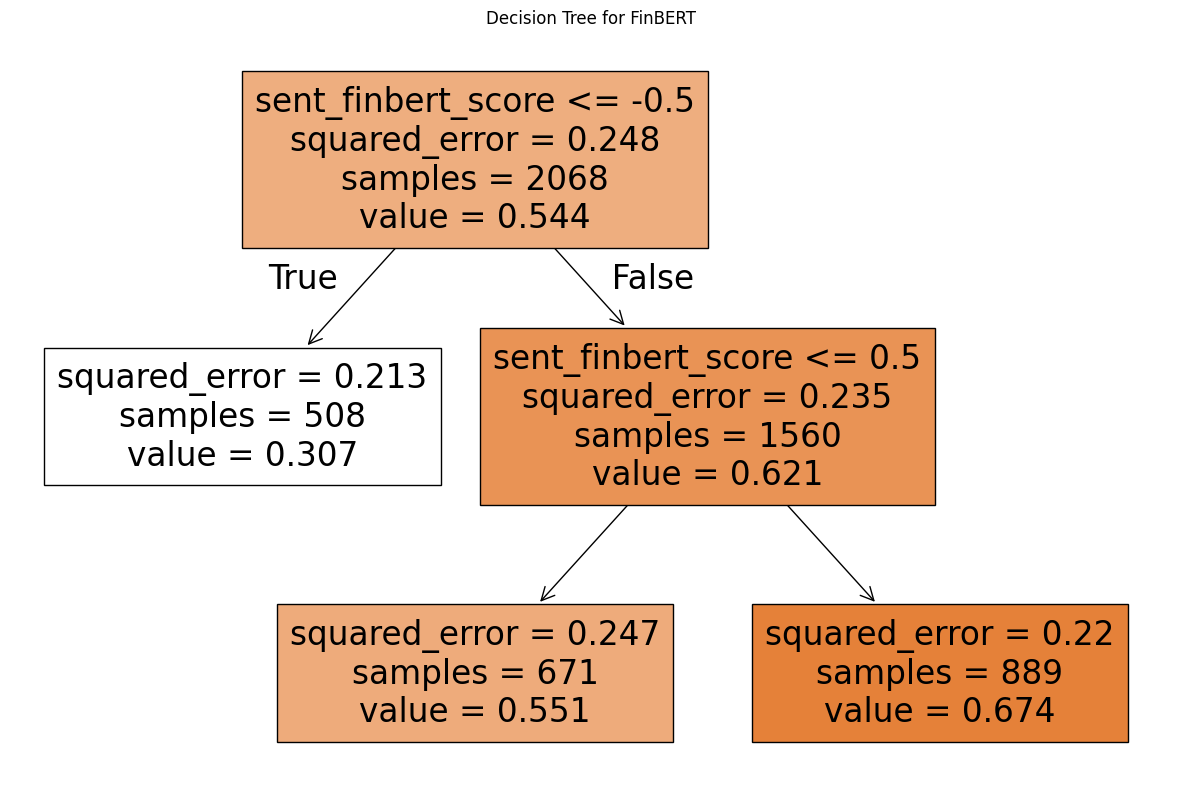

In [124]:
# Plot the decision tree for FinBERT
plt.figure(figsize=(15, 10))
plot_tree(tree_finbert, feature_names=X_finbert.columns, filled=True)
plt.title("Decision Tree for FinBERT")
plt.show()

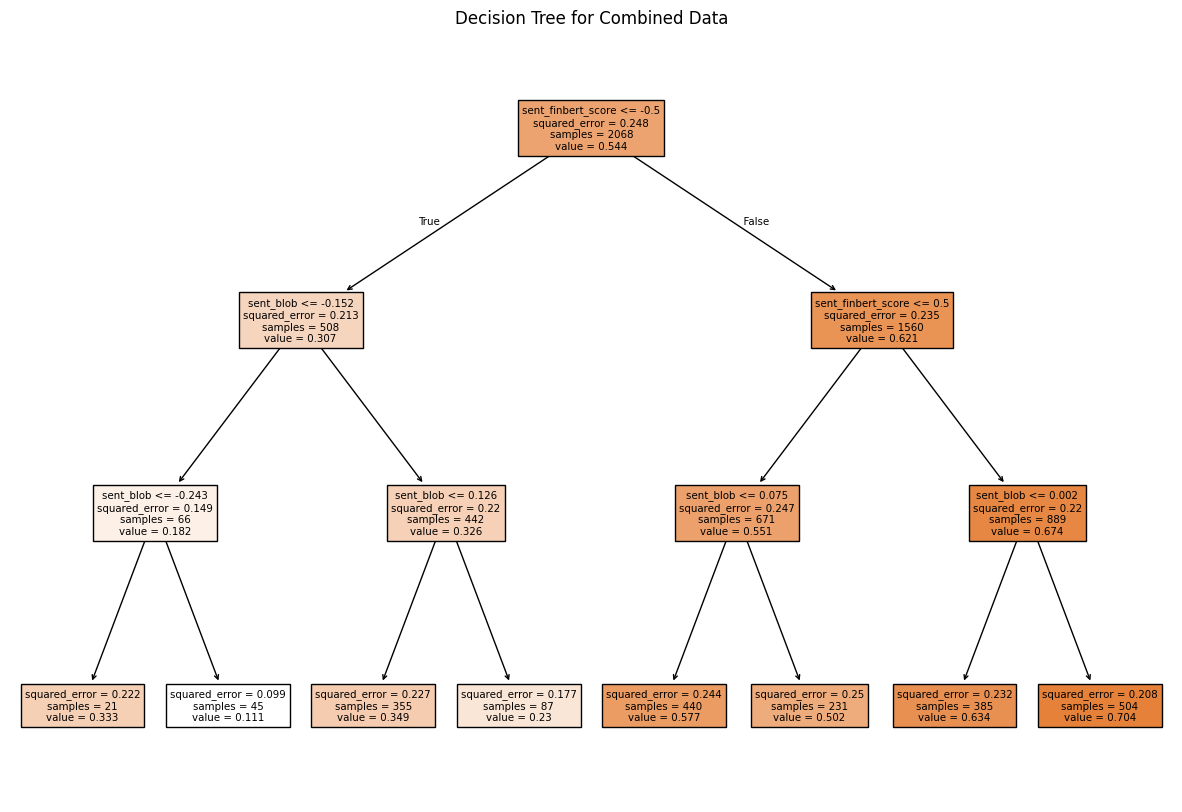

In [125]:
# Plot the decision tree for Combined Data
plt.figure(figsize=(15, 10))
plot_tree(tree_combined, feature_names=X_combined.columns, filled=True)
plt.title("Decision Tree for Combined Data")
plt.show()

## Random Forest regression

In [126]:
# TextBlob only
X_blob = data_df[['sent_blob']]
y = data_df['eventRet']  # Target variable for regression

# FinBERT only
X_finbert = data_df[['sent_finbert_score']]

# Combined data (TextBlob + FinBERT)
X_combined = data_df[['sent_blob', 'sent_finbert_score']]

In [129]:
# Function to run Random Forest regression
def run_random_forest(X, y, label):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Random Forest regression model
    rf_reg = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
    rf_reg.fit(X_train, y_train)

    # Predictions
    y_pred = rf_reg.predict(X_test)

    # Evaluation
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"--- {label} ---")
    print(f"MSE: {mse}")
    print(f"R²: {r2}\n")

    return mse, r2

# Regression on TextBlob
mse_blob, r2_blob = run_random_forest(X_blob, y, "TextBlob")

# Regression on FinBERT
mse_finbert, r2_finbert = run_random_forest(X_finbert, y, "FinBERT")

# Regression on Combined data
mse_combined, r2_combined = run_random_forest(X_combined, y, "Combined (TextBlob + FinBERT)")

--- TextBlob ---
MSE: 0.004494649858267898
R²: -0.015245878851898098

--- FinBERT ---
MSE: 0.004246347698266606
R²: 0.04084030196319266

--- Combined (TextBlob + FinBERT) ---
MSE: 0.004511305518360931
R²: -0.0190080384866258



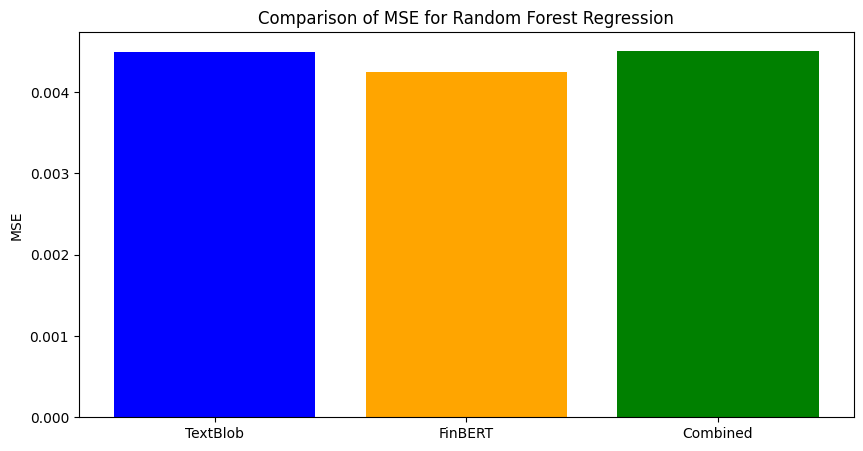

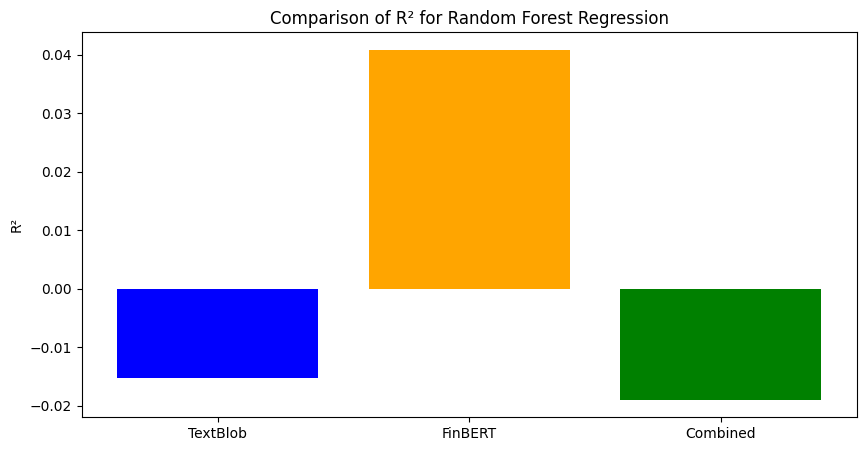

In [131]:
# Results
labels = ['TextBlob', 'FinBERT', 'Combined']
mse_values = [mse_blob, mse_finbert, mse_combined]
r2_values = [r2_blob, r2_finbert, r2_combined]

# MSE
plt.figure(figsize=(10, 5))
plt.bar(labels, mse_values, color=['blue', 'orange', 'green'])
plt.title("Comparison of MSE for Random Forest Regression")
plt.ylabel("MSE")
plt.show()

# R²
plt.figure(figsize=(10, 5))
plt.bar(labels, r2_values, color=['blue', 'orange', 'green'])
plt.title("Comparison of R² for Random Forest Regression")
plt.ylabel("R²")
plt.show()

## K-Nearest Neighbors (KNN)

In [132]:
# TextBlob only
X_blob = data_df[['sent_blob']]
y = data_df['target_binary']  # Target variable for classification

# FinBERT only
X_finbert = data_df[['sent_finbert_score']]

# Combined data (TextBlob + FinBERT)
X_combined = data_df[['sent_blob', 'sent_finbert_score']]

In [133]:
# Function to run KNN classification
def run_knn_classification(X, y, label, n_neighbors=5):
    # Split the data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # KNN model
    knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, metric='minkowski', p=2)  # Euclidean distance
    knn_model.fit(X_train, y_train)

    # Predictions
    y_pred = knn_model.predict(X_test)

    # Evaluation
    accuracy = accuracy_score(y_test, y_pred)
    print(f"--- {label} ---")
    print(f"Accuracy: {accuracy}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("\n")

    return accuracy

# KNN on TextBlob
accuracy_blob = run_knn_classification(X_blob, y, "TextBlob")

# KNN on FinBERT
accuracy_finbert = run_knn_classification(X_finbert, y, "FinBERT")

# KNN on Combined data
accuracy_combined = run_knn_classification(X_combined, y, "Combined (TextBlob + FinBERT)")

--- TextBlob ---
Accuracy: 0.525096525096525
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.63      0.56       249
           1       0.56      0.43      0.49       269

    accuracy                           0.53       518
   macro avg       0.53      0.53      0.52       518
weighted avg       0.53      0.53      0.52       518



--- FinBERT ---
Accuracy: 0.4942084942084942
Classification Report:
              precision    recall  f1-score   support

           0       0.48      0.71      0.58       249
           1       0.52      0.29      0.37       269

    accuracy                           0.49       518
   macro avg       0.50      0.50      0.47       518
weighted avg       0.50      0.49      0.47       518



--- Combined (TextBlob + FinBERT) ---
Accuracy: 0.5675675675675675
Classification Report:
              precision    recall  f1-score   support

           0       0.54      0.74      0.62       249
       

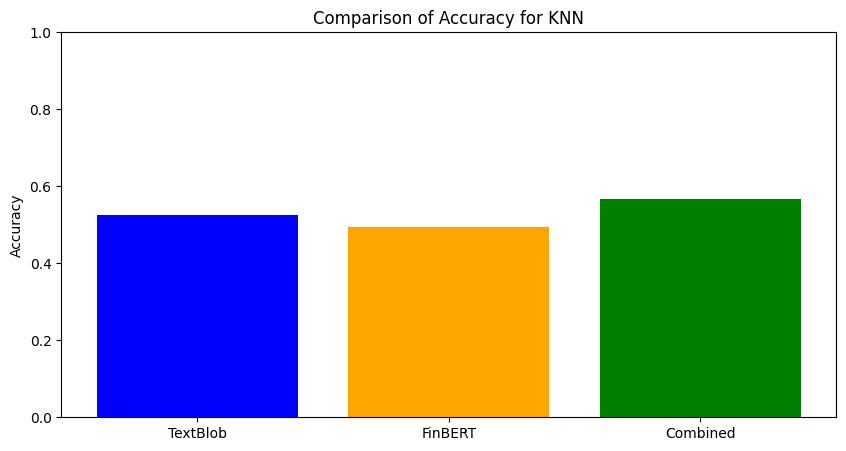

In [134]:
# Results
labels = ['TextBlob', 'FinBERT', 'Combined']
accuracy_values = [accuracy_blob, accuracy_finbert, accuracy_combined]

# Accuracy
plt.figure(figsize=(10, 5))
plt.bar(labels, accuracy_values, color=['blue', 'orange', 'green'])
plt.title("Comparison of Accuracy for KNN")
plt.ylabel("Accuracy")
plt.ylim(0, 1)  # Accuracy is between 0 and 1
plt.show()


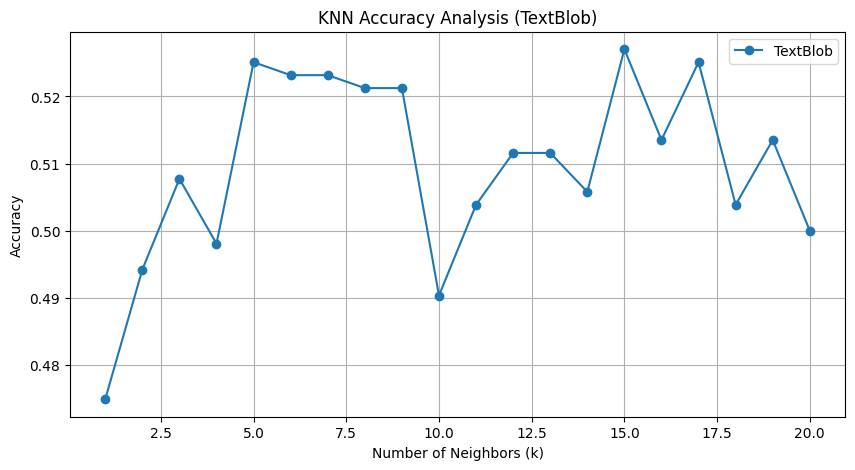

In [136]:
# Function to analyze accuracy for different k values
def knn_k_analysis(X, y, label, k_range=range(1, 21)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    accuracies = []

    for k in k_range:
        knn_model = KNeighborsClassifier(n_neighbors=k, metric='minkowski', p=2)
        knn_model.fit(X_train, y_train)
        y_pred = knn_model.predict(X_test)
        accuracies.append(accuracy_score(y_test, y_pred))

    # Plot results
    plt.figure(figsize=(10, 5))
    plt.plot(k_range, accuracies, marker='o', label=label)
    plt.title(f"KNN Accuracy Analysis ({label})")
    plt.xlabel("Number of Neighbors (k)")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.grid()
    plt.show()

# Analyze KNN performance for each dataset
knn_k_analysis(X_blob, y, "TextBlob")

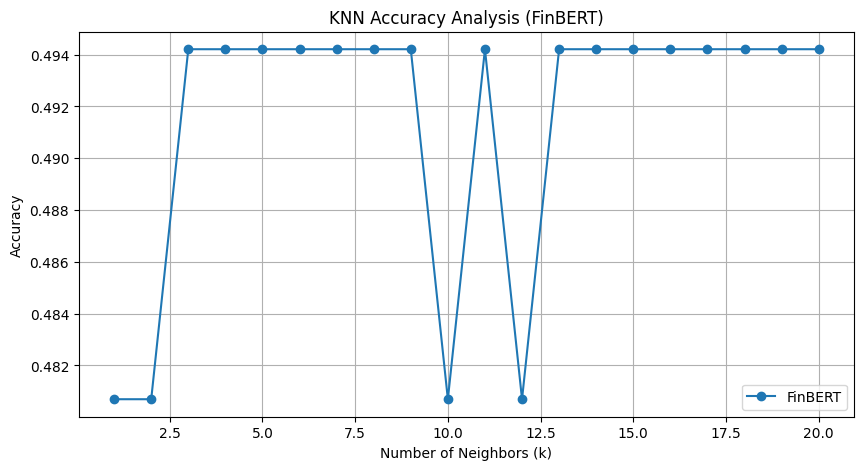

In [137]:
knn_k_analysis(X_finbert, y, "FinBERT")

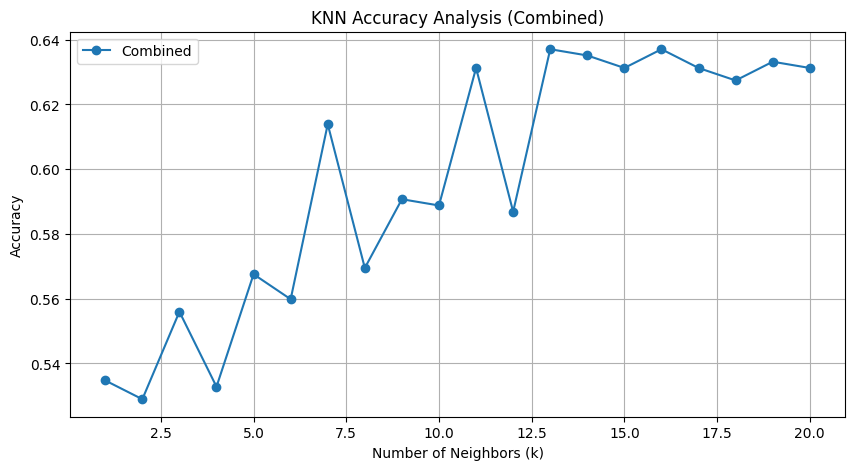

In [138]:
knn_k_analysis(X_combined, y, "Combined")

## Bagging Boosting

In [139]:
# TextBlob data
X_blob = data_df[['sent_blob']]
y = data_df['target_binary']  # Target for classification

# FinBERT data
X_finbert = data_df[['sent_finbert_score']]

# Combined data
X_combined = data_df[['sent_blob', 'sent_finbert_score']]

# Train-test splits
from sklearn.model_selection import train_test_split

X_train_blob, X_test_blob, y_train, y_test = train_test_split(X_blob, y, test_size=0.2, random_state=42)
X_train_finbert, X_test_finbert, _, _ = train_test_split(X_finbert, y, test_size=0.2, random_state=42)
X_train_combined, X_test_combined, _, _ = train_test_split(X_combined, y, test_size=0.2, random_state=42)

In [140]:
# Bagging for TextBlob
bagging_blob = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
bagging_blob.fit(X_train_blob, y_train)
y_pred_bagging_blob = bagging_blob.predict(X_test_blob)
accuracy_bagging_blob = accuracy_score(y_test, y_pred_bagging_blob)

# Bagging for FinBERT
bagging_finbert = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
bagging_finbert.fit(X_train_finbert, y_train)
y_pred_bagging_finbert = bagging_finbert.predict(X_test_finbert)
accuracy_bagging_finbert = accuracy_score(y_test, y_pred_bagging_finbert)

# Bagging for Combined Data
bagging_combined = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42)
bagging_combined.fit(X_train_combined, y_train)
y_pred_bagging_combined = bagging_combined.predict(X_test_combined)
accuracy_bagging_combined = accuracy_score(y_test, y_pred_bagging_combined)

In [141]:
# Boosting for TextBlob
boosting_blob = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
boosting_blob.fit(X_train_blob, y_train)
y_pred_boosting_blob = boosting_blob.predict(X_test_blob)
accuracy_boosting_blob = accuracy_score(y_test, y_pred_boosting_blob)

# Boosting for FinBERT
boosting_finbert = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
boosting_finbert.fit(X_train_finbert, y_train)
y_pred_boosting_finbert = boosting_finbert.predict(X_test_finbert)
accuracy_boosting_finbert = accuracy_score(y_test, y_pred_boosting_finbert)

# Boosting for Combined Data
boosting_combined = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)
boosting_combined.fit(X_train_combined, y_train)
y_pred_boosting_combined = boosting_combined.predict(X_test_combined)
accuracy_boosting_combined = accuracy_score(y_test, y_pred_boosting_combined)

In [144]:
# Compile results into a dictionary
results = {
    "Model": ["Bagging", "Bagging", "Bagging", "Boosting", "Boosting", "Boosting"],
    "Dataset": ["TextBlob", "FinBERT", "Combined", "TextBlob", "FinBERT", "Combined"],
    "Accuracy": [
        accuracy_bagging_blob, accuracy_bagging_finbert, accuracy_bagging_combined,
        accuracy_boosting_blob, accuracy_boosting_finbert, accuracy_boosting_combined
    ]
}
results_df = pd.DataFrame(results)

# Display results in tabular form
print("Model Comparison: Bagging vs Boosting")
print(results_df)

Model Comparison: Bagging vs Boosting
      Model   Dataset  Accuracy
0   Bagging  TextBlob  0.521236
1   Bagging   FinBERT  0.644788
2   Bagging  Combined  0.631274
3  Boosting  TextBlob  0.521236
4  Boosting   FinBERT  0.644788
5  Boosting  Combined  0.640927


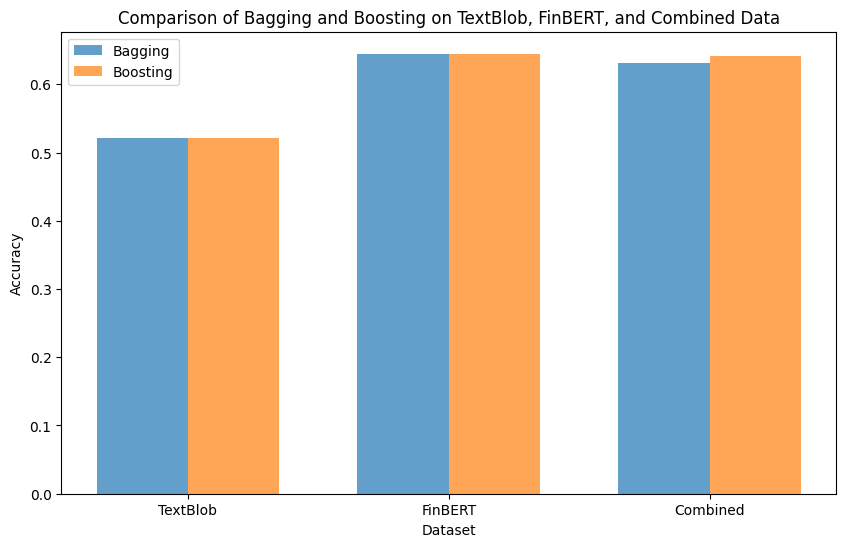

In [147]:
# Create a grouped bar chart to compare accuracies
plt.figure(figsize=(10, 6))

# Subset results for Bagging and Boosting
datasets = ["TextBlob", "FinBERT", "Combined"]
bar_width = 0.35
x = range(len(datasets))

# Accuracy for Bagging and Boosting
bagging_accuracies = [
    accuracy_bagging_blob, accuracy_bagging_finbert, accuracy_bagging_combined
]
boosting_accuracies = [
    accuracy_boosting_blob, accuracy_boosting_finbert, accuracy_boosting_combined
]

# Plot bars for Bagging
plt.bar(x, bagging_accuracies, width=bar_width, label="Bagging", alpha=0.7)

# Plot bars for Boosting
plt.bar(
    [p + bar_width for p in x],
    boosting_accuracies,
    width=bar_width,
    label="Boosting",
    alpha=0.7,
)

# Formatting the plot
plt.xlabel("Dataset")
plt.ylabel("Accuracy")
plt.title("Comparison of Bagging and Boosting on TextBlob, FinBERT, and Combined Data")
plt.xticks([p + bar_width / 2 for p in x], datasets)
plt.legend()

# Display the plot
plt.show()

## SUR DONNEE BLOB

### REGRESSION LINEAIRE

In [ ]:
# Variables explicatives (sentiments) et cible (retour)
X_blob = data_df[['sent_blob']]
y = data_df['eventRet']  # Vous pouvez remplacer par 'Close'

# Diviser en ensemble d'entraînement et de test
X_blob_train, X_blob_test, y_train, y_test = train_test_split(X_blob, y, test_size=0.2, random_state=42)

In [ ]:
# Modèle de régression linéaire
lin_reg = LinearRegression()
lin_reg.fit(X_blob_train, y_train)

LinearRegression()

In [ ]:
# Prédictions sur le test set
y_pred = lin_reg.predict(X_blob_test)

# Évaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"R²: {r2}")

MSE: 0.004412127354992046
R²: 0.0033942007995203527


In [ ]:
print(f"Coefficients: {lin_reg.coef_}")
print(f"Intercept: {lin_reg.intercept_}")

Coefficients: [0.02628845]
Intercept: 0.001697688880192411


### REGRESSION LOGISTIQUE

In [ ]:
# Créer une variable binaire (retour positif/négatif)
data_df['target_binary'] = (data_df['eventRet'] > 0).astype(int)

# Variables explicatives et cible
X_blob = data_df[['sent_blob']]
y = data_df['target_binary']

# Diviser en ensemble d'entraînement et de test
X_blob_train, X_blob_test, y_train, y_test = train_test_split(X_blob, y, test_size=0.2, random_state=42)

In [ ]:
# Modèle de régression logistique
log_reg = LogisticRegression()
log_reg.fit(X_blob_train, y_train)

LogisticRegression()

In [ ]:
# Prédictions
y_pred = log_reg.predict(X_blob_test)

# Matrice de confusion
conf_matrix = confusion_matrix(y_test, y_pred)
print("Matrice de confusion:")
print(conf_matrix)

# Rapport de classification
print("Rapport de classification:")
print(classification_report(y_test, y_pred))

# Précision globale
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Matrice de confusion:
[[ 11 238]
 [  5 264]]
Rapport de classification:
              precision    recall  f1-score   support

           0       0.69      0.04      0.08       249
           1       0.53      0.98      0.68       269

    accuracy                           0.53       518
   macro avg       0.61      0.51      0.38       518
weighted avg       0.60      0.53      0.40       518

Accuracy: 0.5308880308880309


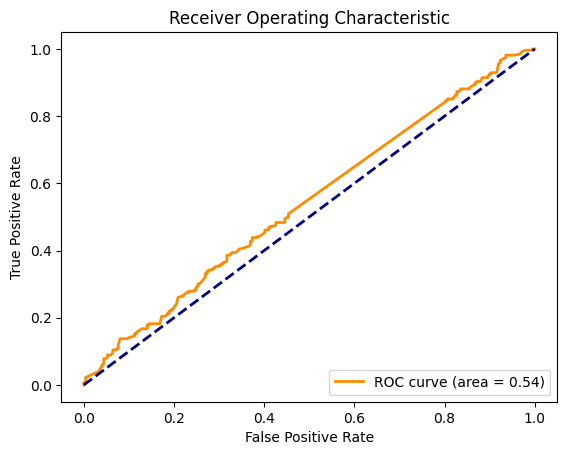

In [ ]:
# Scores de probabilité
y_proba = log_reg.predict_proba(X_blob_test)[:, 1]

# Calcul des courbes ROC
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

# Tracer la courbe ROC
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

### Arbres de Décision

In [ ]:
# Modèle d'arbre de décision avec réglage de max_depth
tree_model = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree_model.fit(X_blob_train, y_train)

# Prédictions
y_pred_tree = tree_model.predict(X_blob_test)

In [ ]:
# Matrice de confusion et rapport de classification
print("Rapport de classification (Arbre de décision):")
print(classification_report(y_test, y_pred_tree))

# Précision globale
accuracy_tree = accuracy_score(y_test, y_pred_tree)
print(f"Accuracy (Arbre de décision): {accuracy_tree}")

Rapport de classification (Arbre de décision):
              precision    recall  f1-score   support

           0       0.52      0.10      0.17       249
           1       0.52      0.91      0.67       269

    accuracy                           0.52       518
   macro avg       0.52      0.51      0.42       518
weighted avg       0.52      0.52      0.43       518

Accuracy (Arbre de décision): 0.5231660231660231


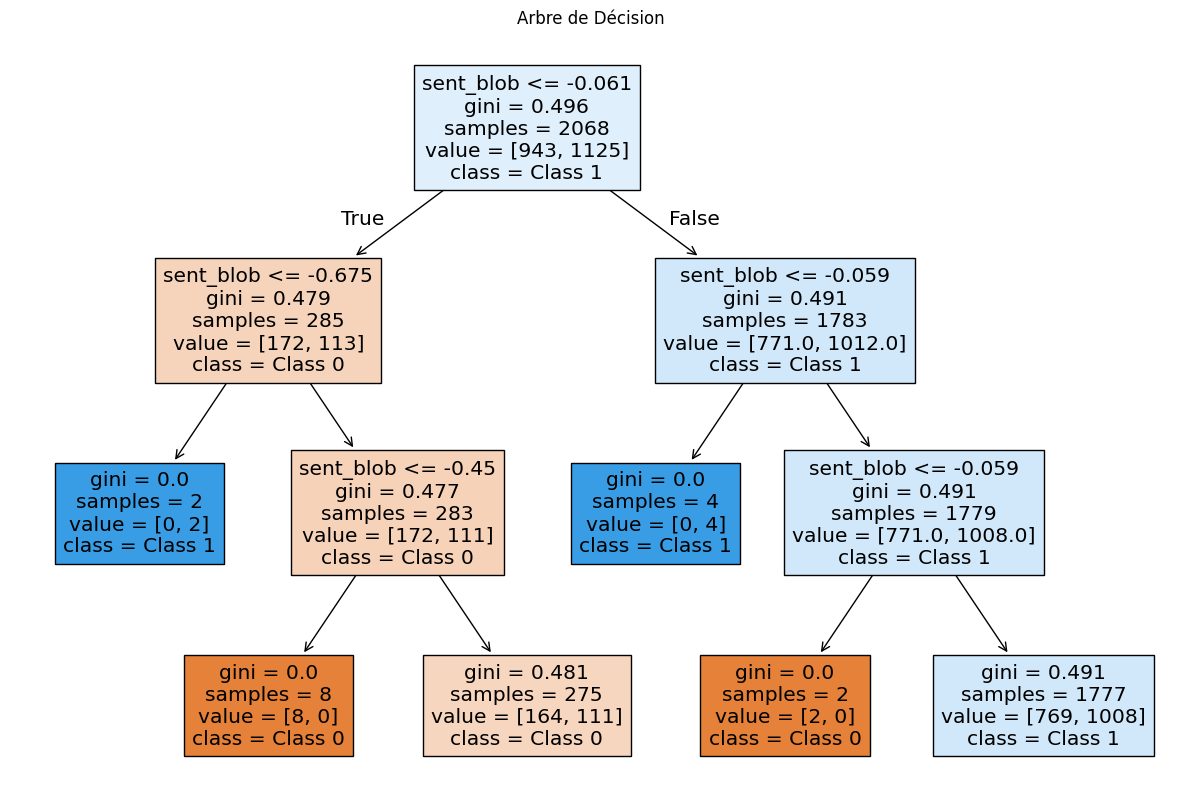

In [ ]:
plt.figure(figsize=(15, 10))
plot_tree(tree_model, feature_names=X.columns, class_names=['Class 0', 'Class 1'], filled=True)
plt.title("Arbre de Décision")
plt.show()

In [ ]:
# Importance des caractéristiques
importances = tree_model.feature_importances_
for feature, importance in zip(X.columns, importances):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: sent_blob, Importance: 1.0000


### Random Forest

In [ ]:
# Modèle Random Forest avec réglages
rf_model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_model.fit(X_blob_train, y_train)

# Prédictions
y_pred_rf = rf_model.predict(X_blob_test)

In [ ]:
# Matrice de confusion et rapport de classification
print("Rapport de classification (Random Forest):")
print(classification_report(y_test, y_pred_rf))

# Précision globale
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Accuracy (Random Forest): {accuracy_rf}")

Rapport de classification (Random Forest):
              precision    recall  f1-score   support

           0       0.57      0.14      0.22       249
           1       0.53      0.90      0.67       269

    accuracy                           0.53       518
   macro avg       0.55      0.52      0.44       518
weighted avg       0.55      0.53      0.45       518

Accuracy (Random Forest): 0.5347490347490348


In [ ]:
# Importance des caractéristiques
importances_rf = rf_model.feature_importances_
for feature, importance in zip(X.columns, importances_rf):
    print(f"Feature: {feature}, Importance: {importance:.4f}")

Feature: sent_blob, Importance: 1.0000


In [ ]:
# Validation croisée
cv_scores_rf = cross_val_score(rf_model, X_blob, y, cv=5)
print(f"Validation croisée - Mean accuracy (Random Forest): {cv_scores_rf.mean():.4f}")

Validation croisée - Mean accuracy (Random Forest): 0.5534


### k-Nearest Neighbors (KNN)

In [ ]:
# Modèle KNN avec réglage de k (nombre de voisins)
knn_model = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)  # Distance euclidienne (p=2)
knn_model.fit(X_blob_train, y_train)

# Prédictions
y_pred_knn = knn_model.predict(X_blob_test)

In [ ]:
# Matrice de confusion et rapport de classification
print("Rapport de classification (KNN):")
print(classification_report(y_test, y_pred_knn))

# Précision globale
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"Accuracy (KNN): {accuracy_knn}")

Rapport de classification (KNN):
              precision    recall  f1-score   support

           0       0.50      0.63      0.56       249
           1       0.56      0.43      0.49       269

    accuracy                           0.53       518
   macro avg       0.53      0.53      0.52       518
weighted avg       0.53      0.53      0.52       518

Accuracy (KNN): 0.525096525096525


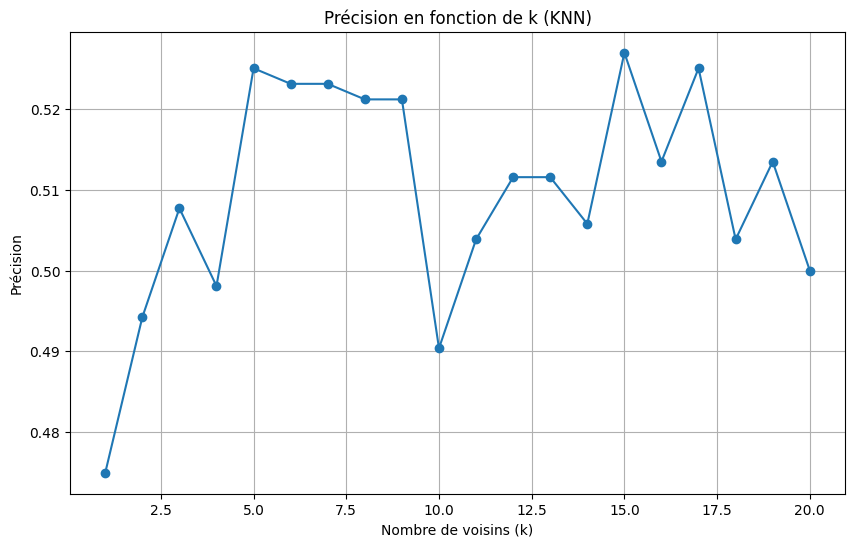

In [ ]:
# Essayer différents k et mesurer la précision
k_values = range(1, 21)
accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_blob_train, y_train)
    y_pred = knn_model.predict(X_blob_test)
    accuracies.append(accuracy_score(y_test, y_pred))

# Tracer les précisions
plt.figure(figsize=(10, 6))
plt.plot(k_values, accuracies, marker='o')
plt.title("Précision en fonction de k (KNN)")
plt.xlabel("Nombre de voisins (k)")
plt.ylabel("Précision")
plt.grid()
plt.show()